https://www.kaggle.com/competitions/bike-sharing-demand

- datetime형 칼럼 전처리
- 데이터의 분포와 np.log1p(), np.expm1()
- 카테고리형 변수 원-핫 인코딩
- train 데이터와 test 데이터의 칼럼 align
- 회귀 계수를 보고 결론 내리기

# Bike Sharing Demand

2011년 1월부터 2012년 12월까지 날짜/시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안의 자전거 대여 횟수가 기재돼 있습니다. <br>
결정 값은 맨 마지막 칼럼인 count로 '대여 횟수'를 의미합니다.

- datetime: 시간: 연-월-일 시-분-초
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
- workingday: 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
- 1=맑음, 약간 구름 낀 흐림
- 2=안개, 안개 + 흐림
- 3=가벼운 눈, 가벼운 비 + 천둥
- 4=심한 눈/비, 천둥/번개
- temp: 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity: 상대습도
- windspeed: 풍속
- casual: 비회원 대여한 횟수
- registered: 회원 대여한 횟수
- count: 대여 횟수


In [421]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore')

# 1. 데이터 로드
- train.csv 데이터 세트를 이용해 모델을 학습한 후 대여 횟수(count)를 예측

In [422]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [424]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [425]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [426]:
# categorical data에 해당하는 1~4까지의 column에 대해 unique 값 추출
for x in np.array(df.columns[1:5].unique()):
    print(x), print(df[x].unique())

season
[1 2 3 4]
holiday
[0 1]
workingday
[0 1]
weather
[1 2 3 4]


# 2. 시각화 (1)

<AxesSubplot:>

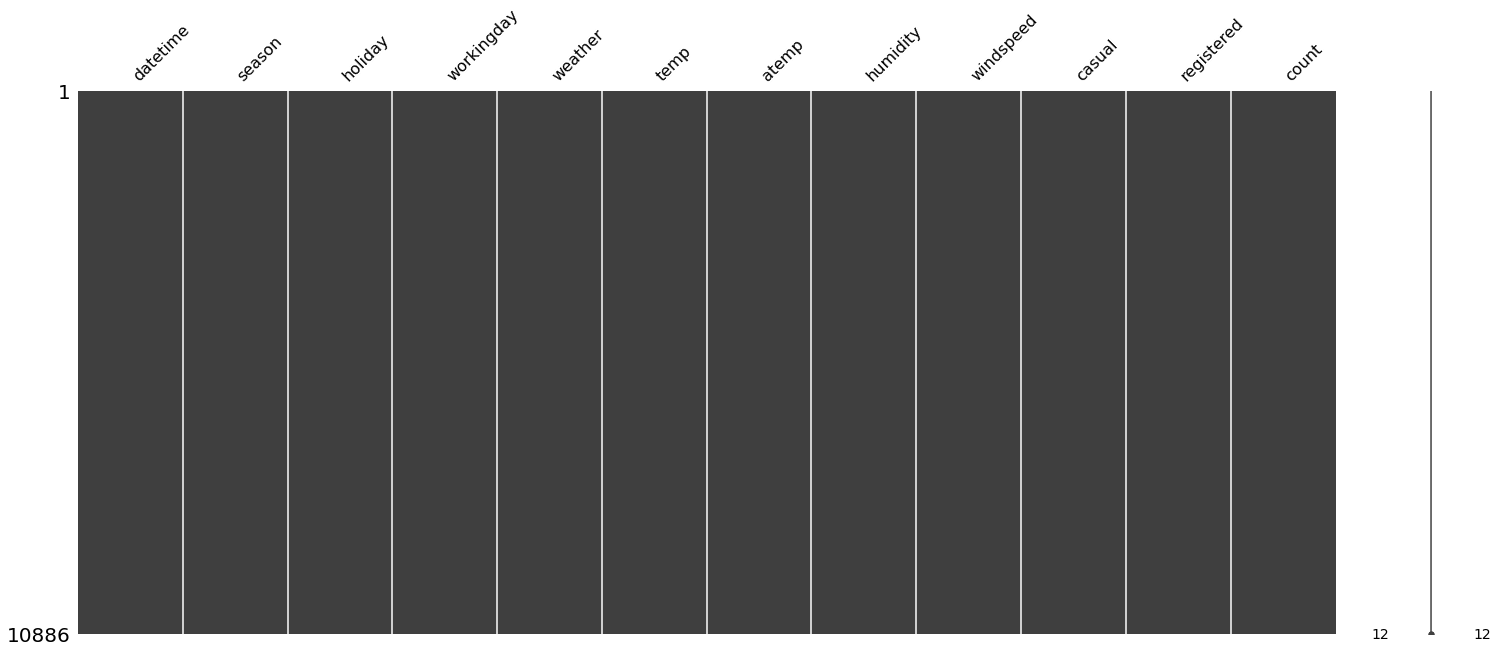

In [427]:
import missingno as msno
msno.matrix(df)

- 결측치를 시각적으로 보고 싶을 때 missingno을 사용합니다.


## 범주형 데이터 확인
- 전체 데이터셋에서 각 unique value가 차지하는 값 확인
- sns.catplot(kind = 'count') 이용
- 범주형 데이터 일 때 => catplot
---
- season: 사계절
- holiday: 공휴일 여부
- workingday: 근무일 여부
- weather: 날씨(숫자 작을수록 좋은 날씨)

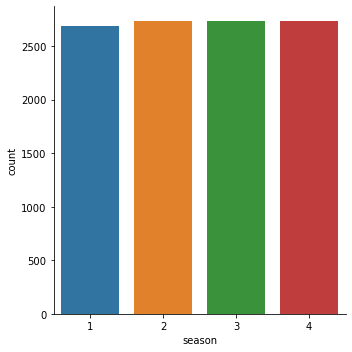

In [428]:
import seaborn as sns
sns.catplot(x='season',data=df,kind='count',height=5,aspect=1) 

In [429]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

- season은 사계절로 전체 데이터셋에서 1=봄 에 해당하는 값이 다른 값보다 조금 더 적음을 알 수 있습니다.

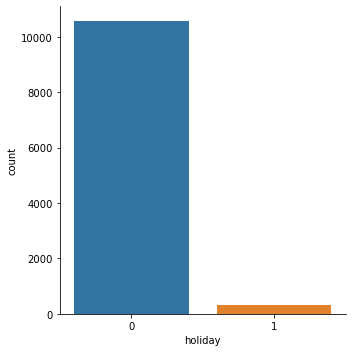

In [430]:
sns.catplot(x='holiday',data=df,kind='count',height=5,aspect=1) 

- 전체 데이터셋에서 holiday아닌 날이 holiday보다 훨씬 더 많은 것을 확인할 수 있습니다.

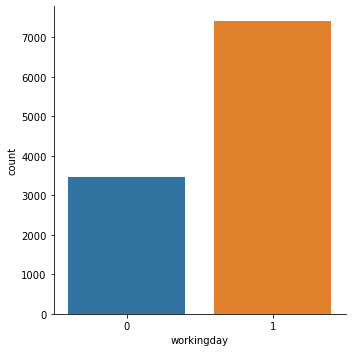

In [431]:
sns.catplot(x='workingday',data=df,kind='count',height=5,aspect=1)

- 전체 데이터셋에서 workingday가 workingday가 아닌 날보다 더 많은 것을 확인할 수 있습니다.

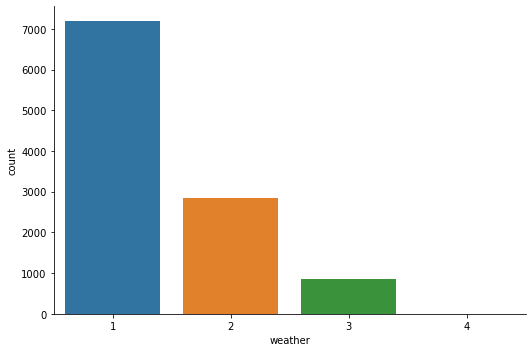

In [432]:
sns.catplot(x='weather',data=df,kind='count',height=5,aspect=1.5)

- 전체 데이터셋에서 기상이 좋았던 날이 안 좋았던 날들보다 많음을 알 수 있습니다.

## 연속형 데이터 확인
- sns.boxplot을 이용해서 이상치와 값 분포 확인
---
- temp: 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity: 상대습도
- windspeed: 풍속

<AxesSubplot:ylabel='temp'>

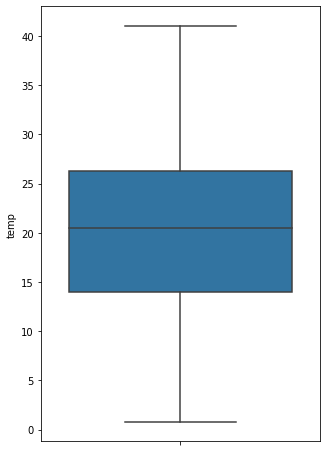

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,8))
sns.boxplot(y=df['temp'])

- 온도는 이상치도 없고 정규분포와 비슷하게 잘 분포되어 있음을 알 수 있습니다.

<AxesSubplot:ylabel='atemp'>

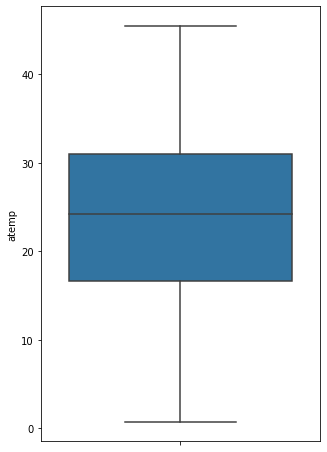

In [434]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y=df['atemp'])

- 체감 온도는 이상치도 없고 정규분포와 비슷하게 잘 분포되어 있음을 알 수 있습니다.

<AxesSubplot:ylabel='humidity'>

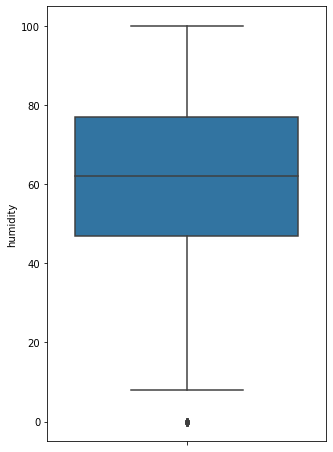

In [435]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y=df['humidity'])

- 습도는 습도가 0이 나오는 이상치가 꽤 존재하는 것을 알 수 있습니다.

<AxesSubplot:ylabel='windspeed'>

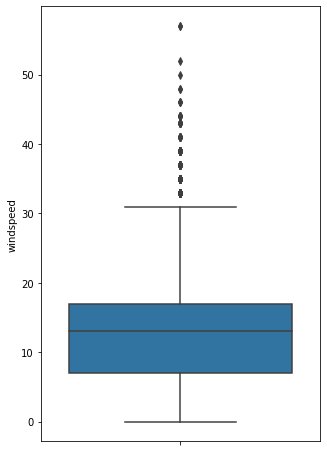

In [436]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y=df['windspeed'])

- 풍속은 풍속이 30을 넘어가는 이상치들이 꽤 존재하며 풍속이 0이 나오는 이상치들이 존재하는 것을 알 수 있습니다.

### 습도와 풍속의 이상치 확인
- 0인 값

In [437]:
df[df['humidity'] == 0].count()[0]

22

In [438]:
df[df['windspeed'] == 0].count()[0]

1313

In [439]:
df[(df['windspeed'] == 0)&(df['weather'] != 1)].count()[0]

412

- 습도의 경우 사실상 0이 될 수 없으므로 결측치임을 알 수 있고
- 풍속의 경우도 전체 약 1만건에 비해 풍속 0이 1313건이나 되는 것, 맑지 않은 날에도 풍속을 0으로 측정한 날이 400건이나 되는 것을 보아 해당 0 값이 결측치라고 유추할 수 있습니다.

# 3. 독립변수 데이터 전처리
- 대부분의 칼럼이 int 또는 float형인데, datetime 칼럼만 object 형입니다.
- Datetime 칼럼의 경우 년-월-일 시:분:초 문자 형식으로 되어 있으므로 이에 대한 가공이 필요합니다.
- datetime을 년, 월, 일, 그리고 시간과 같이 4개의 속성으로 분리하겠습니다.(분, 초는 00 이므로 분리할 필요가 없습니다.)
- (판다스에서는 datetime과 같은 형태의 문자열을 년도, 월, 일, 시간, 분, 초로 편리하게 변환하려면)
#### 먼저 문자열을 'datetime' 타입으로 변경해야 합니다.

## datetime 처리

In [440]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [441]:
df['datetime']=pd.to_datetime(df['datetime'])
df_test['datetime']=pd.to_datetime(df_test['datetime'])

In [442]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day

df['hour']=df['datetime'].dt.hour
df['day_of_week']=df['datetime'].dt.dayofweek

In [443]:
df_test['year']=df_test['datetime'].dt.year
df_test['month']=df_test['datetime'].dt.month
df_test['day']=df_test['datetime'].dt.day

df_test['hour']=df_test['datetime'].dt.hour
df_test['day_of_week']=df_test['datetime'].dt.dayofweek

- 새롭게 year, month, day, hour 칼럼이 추가되었습니다.

In [444]:
df = df.drop(columns = ["datetime", "casual", 'registered'])

- 이제 datetime 칼럼은 삭제하겠습니다.
- 또한 casual 칼럼과 registered 칼럼은 test 데이터셋에 주어지지 않으므로 삭제하겠습니다.

In [445]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,2


## 결측치 처리
- 시각화(1)에서 확인한 결측치들을 랜덤포레스트를 이용해 처리합니다.
- (평균, 중간값, 기상 관련 다른 독립변수를 이용한 머신러닝으로 채운 값들 중, 머신러닝을 이용한 결측치 처리로 습도와 풍속을 채웠을 때 가장 정확도가 높았음)

In [446]:
### 습도와 풍속 결측치를 중간값 혹은 평균으로 채우는 코드

# df = df.replace({'humidity':{0:df['humidity'].mean()}})
# df = df.replace({'windspeed':{0:df['windspeed'].median()}})

In [447]:
# 풍속이 0인 데이터와 0이 아닌 데이터들로 나눠준다.
trainWind0 = df.loc[df["windspeed"] == 0]
trainWindNot0 = df.loc[df["windspeed"] != 0]

# 풍속이 0인 변수들을 머신러닝 모델을 사용하여 예측하고 예측된 값으로 대체해주는 방법
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0
    
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data


# 예측된 값이 잘 들어갔는지 확인
df = predict_windspeed(df)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
0,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5,5
1,1,0,0,1,15.58,19.695,76,16.9979,36,2011,1,1,10,5
2,1,0,0,1,14.76,16.665,81,19.0012,56,2011,1,1,11,5
3,1,0,0,1,17.22,21.210,77,19.0012,84,2011,1,1,12,5
4,1,0,0,2,18.86,22.725,72,19.9995,94,2011,1,1,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,2,16.40,20.455,87,6.0032,232,2012,12,17,12,0
10882,4,0,1,2,17.22,21.210,88,8.9981,211,2012,12,17,15,0
10883,4,0,1,1,15.58,19.695,94,6.0032,662,2012,12,18,8,1
10884,4,0,1,1,13.94,16.665,49,12.9980,132,2012,12,18,22,1


- 풍속 결측치

In [448]:
trainhumidity0 = df.loc[df["humidity"] == 0]
trainhumidityNot0 = df.loc[df["humidity"] != 0]

# 풍속이 0인 변수들을 머신러닝 모델을 사용하여 예측하고 예측된 값으로 대체해주는 방법
from sklearn.ensemble import RandomForestClassifier

def predict_humidityspeed(data):
    datahumidity0 = data.loc[data["humidity"] == 0]
    datahumidityNot0 = data.loc[data["humidity"] != 0]
    
    wcol = ["season", "weather", "windspeed", "day", "temp", "atemp"]
    
    datahumidityNot0["humidity"] = datahumidityNot0["humidity"].astype("str")
    
    rf_humidity = RandomForestClassifier()
    rf_humidity.fit(datahumidityNot0[wcol], datahumidityNot0["humidity"])
    humidity0 = rf_humidity.predict(X=datahumidity0[wcol])
    
    
    predicthumidity0 = datahumidity0
    predicthumidityNot0 = datahumidityNot0
    
    predicthumidity0["humidity"] = humidity0
    
    data = predicthumidityNot0.append(predicthumidity0)
    
    data["humidity"] = data["humidity"].astype("float")
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data


# 예측된 값이 잘 들어갔는지 확인
df = predict_humidityspeed(df)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
0,1,0,0,2,9.84,12.880,75.0,6.0032,1,2011,1,1,5,5
1,1,0,0,1,15.58,19.695,76.0,16.9979,36,2011,1,1,10,5
2,1,0,0,1,14.76,16.665,81.0,19.0012,56,2011,1,1,11,5
3,1,0,0,1,17.22,21.210,77.0,19.0012,84,2011,1,1,12,5
4,1,0,0,2,18.86,22.725,72.0,19.9995,94,2011,1,1,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,0,1,3,18.04,21.970,100.0,39.0007,56,2011,3,10,19,3
10882,1,0,1,3,14.76,16.665,87.0,22.0028,38,2011,3,10,20,3
10883,1,0,1,3,14.76,17.425,93.0,15.0013,28,2011,3,10,21,3
10884,1,0,1,2,13.94,16.665,45.0,8.9981,34,2011,3,10,22,3


- 습도 결측치

In [449]:
df[df['windspeed'] == 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week


In [450]:
df[df['humidity'] == 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week


- 결측치 처리가 완료되어 0인 값이 없음을 확인합니다.

## 독립변수 의미 확인
- holiday는 단순히 주말을 포함하는 것이 아닌 국가(미국) 지정 공휴일임을 확인했습니다.
- 아래에서 holiday가 아니면서 일요일이 아닌 행들이 많음으로 증명할 수 있습니다.

In [451]:
df[(df['holiday'] == 0)&(df['day_of_week'] == 6)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
15,1,0,0,2,18.86,22.725,88.0,19.9995,17,2011,1,2,0,6
16,1,0,0,2,18.04,21.970,94.0,16.9979,17,2011,1,2,1,6
17,1,0,0,2,17.22,21.210,100.0,19.0012,9,2011,1,2,2,6
18,1,0,0,2,18.86,22.725,94.0,12.9980,6,2011,1,2,3,6
19,1,0,0,2,18.86,22.725,94.0,12.9980,3,2011,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,4,0,0,2,13.94,18.180,87.0,6.0032,11,2012,12,16,4,6
10849,4,0,0,2,13.94,18.180,87.0,6.0032,9,2012,12,16,5,6
10850,4,0,0,2,13.94,18.180,87.0,6.0032,6,2012,12,16,6,6
10851,4,0,0,2,15.58,19.695,82.0,7.0015,122,2012,12,16,20,6


# 4. 시각화(2) 독립변수별 종속변수 간의 관계
- 종속변수는 count로 해당 시간의 자전거 대여 횟수입니다.
- count per **으로 나타냅니다.

Text(0.5, 1.0, 'Count per Year')

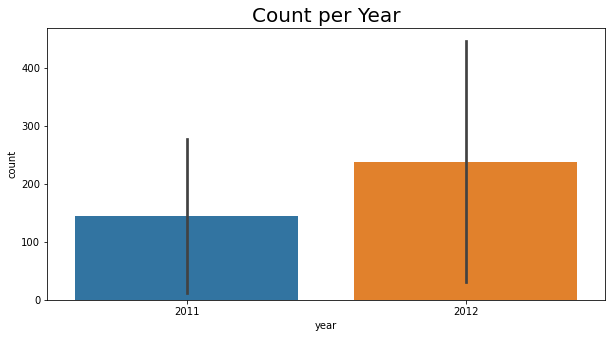

In [452]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='year',y='count',data=df,ci='sd')
plt.title("Count per Year",fontsize=20)

- 2012년에 평균적으로 자전거 이용 횟수가 많음을 확인할 수 있습니다.

Text(0.5, 1.0, 'Count per Month')

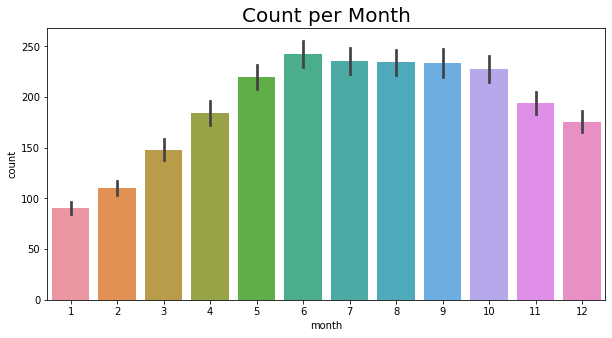

In [453]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',data=df)
plt.title("Count per Month",fontsize=20)

- 주로 연말, 연초 보다 6~9월 중 많이 사용했음을 확인할 수 있습니다.

Text(0.5, 1.0, 'count per hour')

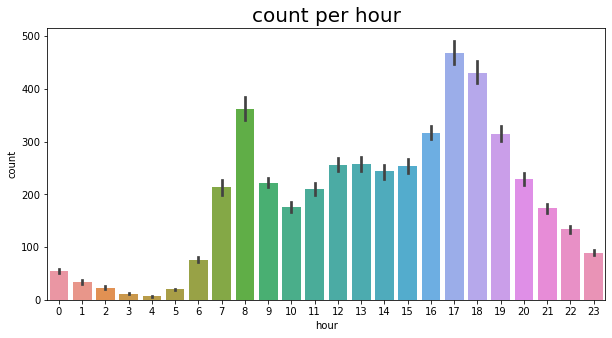

In [454]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='hour',y='count',data=df)
plt.title("count per hour",fontsize=20)

- 시간대별 자전거 대여 횟수를 보면 출근 시간대인 8시와 퇴근 시간대인 17~18시에 가장 많은 대여량을 보이는 것을 확인할 수 있습니다.
- 이를 통해 이 데이터셋의 자전거 대여는 주로 출퇴근 시간대에 이뤄졌음을 알 수 있습니다.

Text(0.5, 1.0, 'Count per Season')

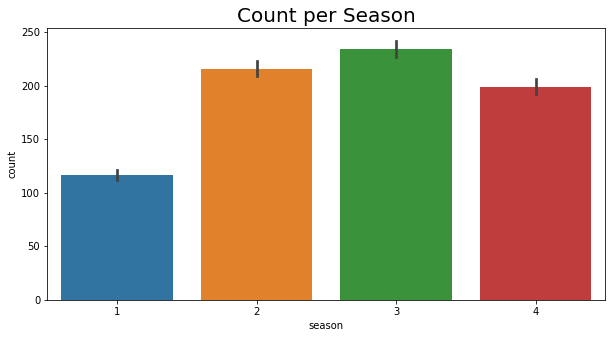

In [455]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='season',y='count',data=df)
plt.title("Count per Season",fontsize=20)

- 봄에 자전거를 빌리는 사람이 적음을 알 수 있습니다.

Text(0.5, 1.0, 'Count per Holiday')

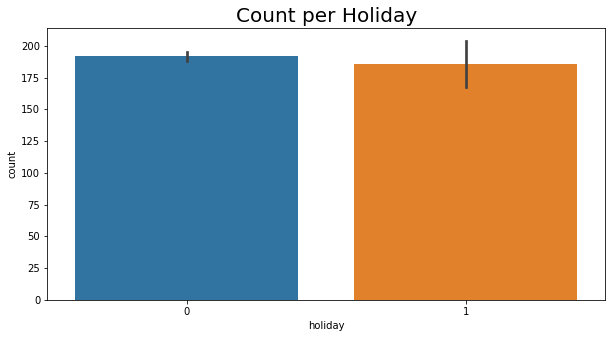

In [456]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='holiday',y='count',data=df)
plt.title("Count per Holiday",fontsize=20)

- 공휴일과 공휴일이 아닐 때는 크게 차이가 안 나는 것을 볼 수 있습니다.

<AxesSubplot:xlabel='weather', ylabel='count'>

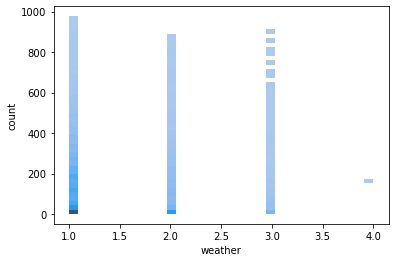

In [457]:
sns.histplot(df, x = 'weather', y= 'count')

In [458]:
df[df['weather'] == 4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
4899,1,0,1,4,8.2,11.365,86.0,6.0032,164,2012,1,9,18,0


- barplot으로 확인했을 때 기상이 가장 안 좋은 weather == 4의 경우가 3인 경우보다 오히려 많음이 이상하다는 것을 확인할 수 있습니다.
- barplot은 카테고리별 변수의 count는 그래프에 나타내주기 힘드므로 histplot 및 코드를 통해 날씨가 4일 때를 확인해줍니다.
- 날씨가 4인 경우는 대략 1만개의 전체 데이터 중 1시간만 존재함을 알 수 있습니다.

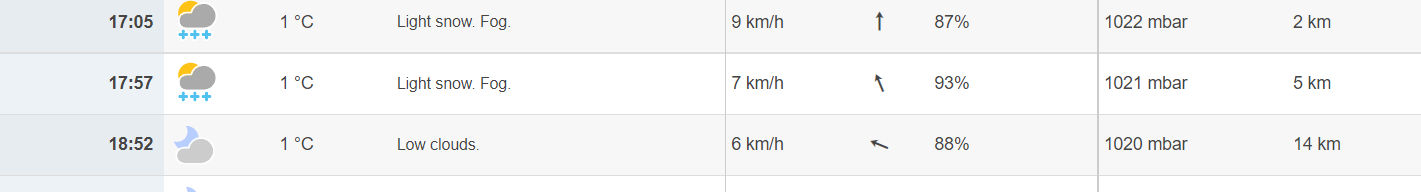
- 이 사진은 해당 날짜의 해당 시간, 데이터셋이 측정된 워싱턴 dc의 날씨 기록입니다.
- 날씨가 4로 측정 되었지만 위의 날씨 기록을 통해 실제로는 잠깐동안 심한 눈이 내렸음을 알 수 있습니다.
- 또 count수가 높은 것은 해당 시간이 18시로 평균적으로 가장 count가 높은 시간대임을 감안할 수 있습니다.

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by holiday')]

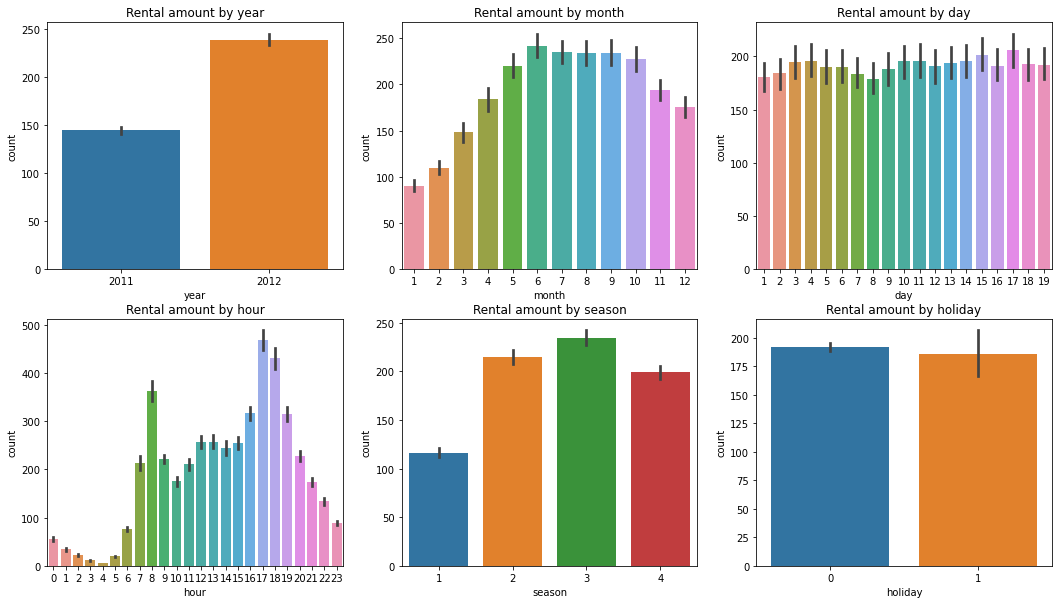

In [459]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=df, x = "year",y='count', ax = ax1)
sns.barplot(data=df, x = "month", y='count', ax = ax2)
sns.barplot(data=df, x = "day", y='count', ax = ax3)
sns.barplot(data=df, x = "hour", y='count', ax = ax4)
sns.barplot(data=df, x = "season", y='count', ax = ax5)
sns.barplot(data=df, x = "holiday", y='count', ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")
ax5.set(ylabel = "count", title = "Rental amount by season")
ax6.set(ylabel = "count", title = "Rental amount by holiday")

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by hour')]

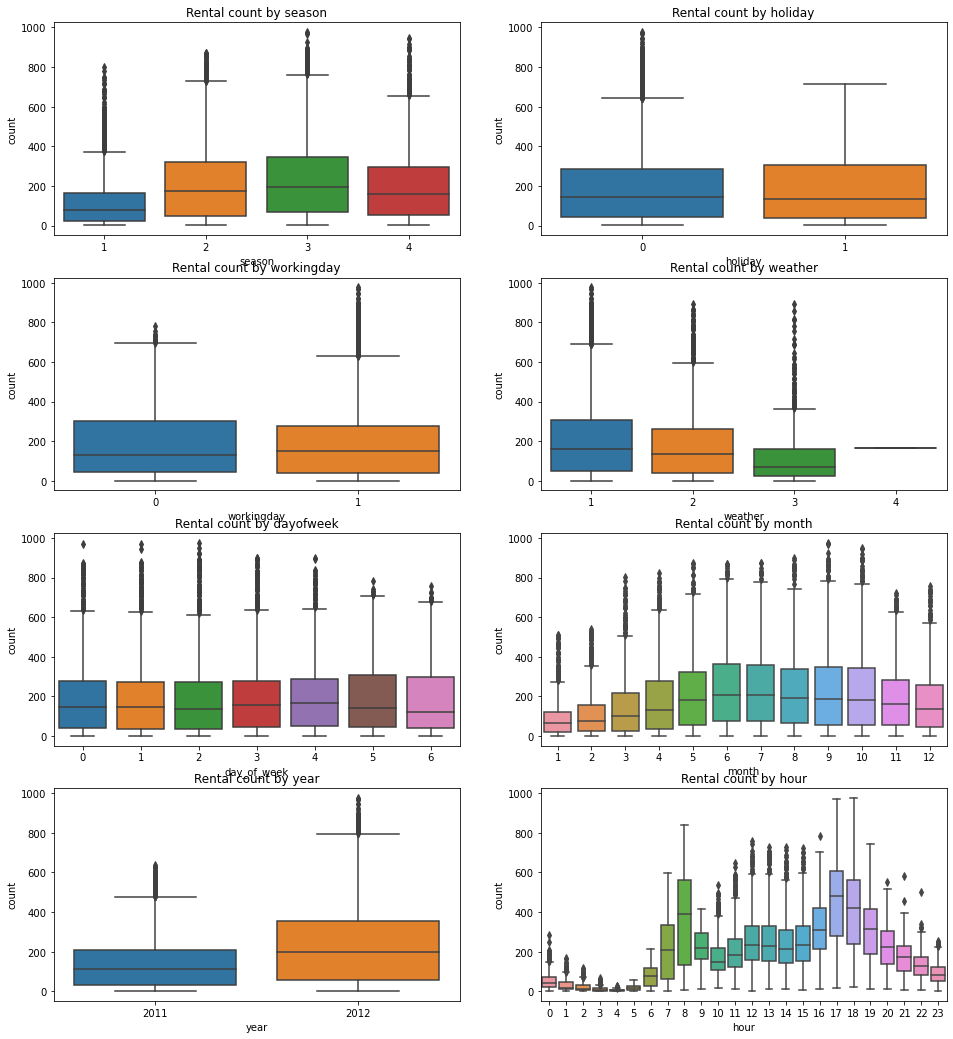

In [460]:
# 각 변수들을 이용해 Boxplor 그려주기
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(16, 18))
sns.boxplot(data = df, y="count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = df, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = df, y="count", x = "workingday", orient = "v", ax = axes[1][0])
sns.boxplot(data = df, y="count", x = "weather", orient = "v", ax = axes[1][1])
sns.boxplot(data = df, y="count", x = "day_of_week", orient = "v", ax = axes[2][0])
sns.boxplot(data = df, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = df, y="count", x = "year", orient = "v", ax = axes[3][0])
sns.boxplot(data = df, y="count", x = "hour", orient = "v", ax = axes[3][1])

axes[0][0].set(ylabel = "count", title = "Rental count by season")
axes[0][1].set(ylabel = "count", title = "Rental count by holiday")
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather")
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek")
axes[2][1].set(ylabel = "count", title = "Rental count by month")
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")

<AxesSubplot:xlabel='hour', ylabel='count'>

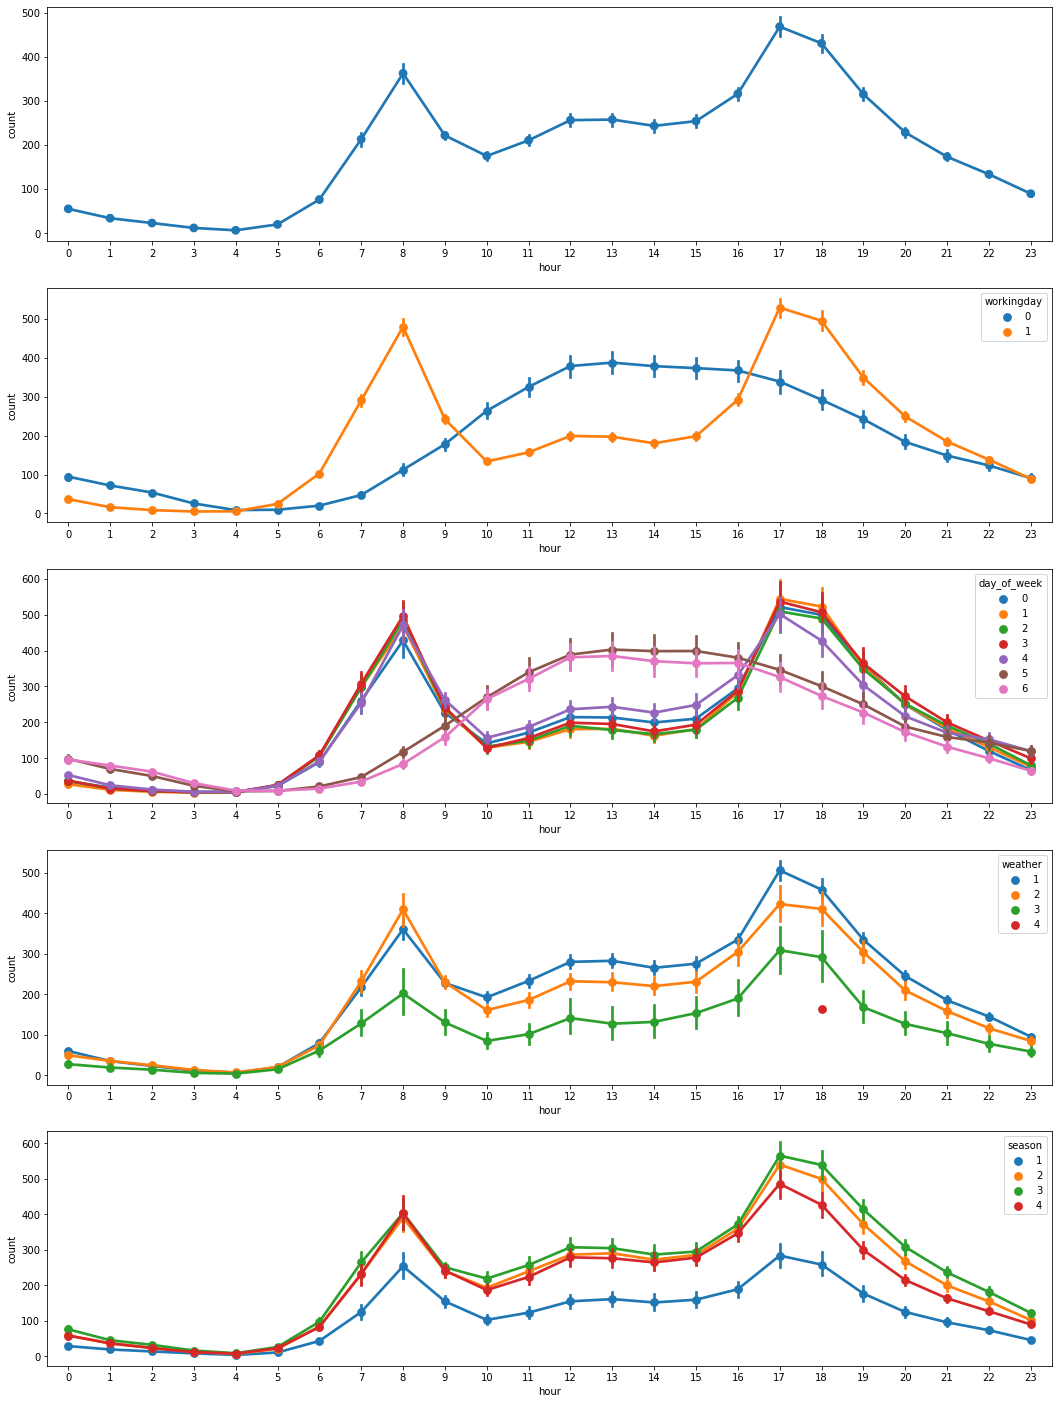

In [461]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = df, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = df, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = df, x = "hour", y = "count", hue = "day_of_week", ax = ax3)
sns.pointplot(data = df, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = df, x = "hour", y = "count", hue = "season",  ax = ax5)

Text(0.5, 1.0, 'Count - Windspeed')

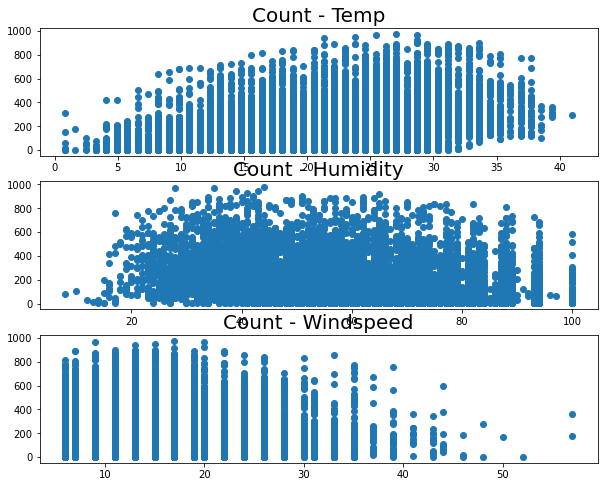

In [462]:
fig=plt.figure(figsize=(10,8))

fig.add_subplot(3,1,1)
plt.scatter(df['temp'],df['count'])
plt.title("Count - Temp",fontsize=20)


fig.add_subplot(3,1,2)
plt.scatter(df['humidity'],df['count'])
plt.title("Count - Humidity",fontsize=20)


fig.add_subplot(3,1,3)
plt.scatter(df['windspeed'],df['count'])
plt.title("Count - Windspeed",fontsize=20)

# 5. 상관도 확인 및 추가 전처리

In [463]:
corr = df[['temp','atemp','humidity', 'windspeed','holiday','workingday','day_of_week','year','month', 'hour','count']].corr()

<AxesSubplot:>

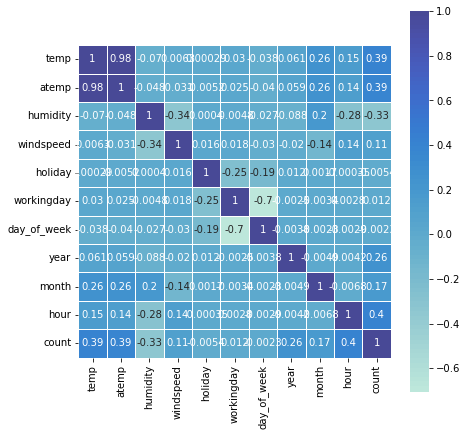

In [464]:
f,axes = plt.subplots(1,1,figsize = (7,7))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)

- 상관도를 보았을 때 day_of_week과 workingday, temp와 atemp는 높은 상관도를 가지고 있으므로 공선성이 있을 수 있습니다.
- 후진 소거법을 이용하여 하나씩 제외하고 확인한 결과 day_of_week, temp를 버리는 것이 정확도가 높게 나왔습니다.
- 또 종속변수 count와 높은 상관도를 가지는 것은 온도, 체감온도, 시간 정도인 것을 알 수 있습니다.

## 종속 변수 전처리

<AxesSubplot:ylabel='count'>

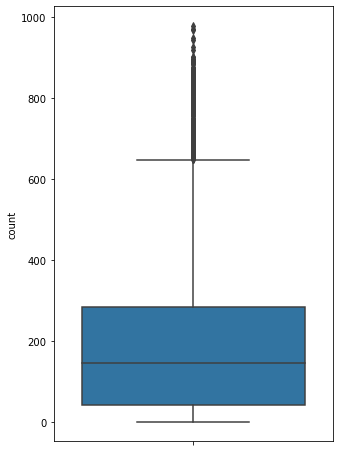

In [465]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y='count',data=df)

<AxesSubplot:xlabel='count', ylabel='Density'>

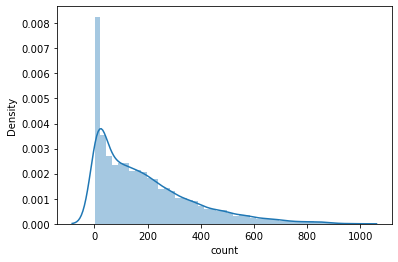

In [466]:
sns.distplot(df['count'])

- count 칼럼 값이 정규 분포가 아닌 0~200 사이에 왜곡돼 있는 것을 알 수 있습니다. <br> 이렇게 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것입니다. <br> 여기서는 넘파이의 log1p()를 이용하겠습니다. <br> 이렇게 변경된 Target 값을 기반으로 학습하고 예측한 값은 다시 expm1() 함수를 적용해 원래 scale 값으로 원상 복구하면 됩니다.<br>
- log1p()를 적용한 count값의 분포를 확인하겠습니다.

<AxesSubplot:xlabel='count', ylabel='Density'>

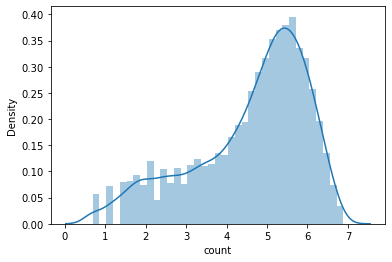

In [467]:
sns.distplot(np.log1p(df['count']))

- 원하는 정규 분포 형태는 아니지만 변환하기 전보다는 왜곡 정도가 많이 향상됐습니다. <br> 이를 이용해 LinearRegression 모델을 학습한 후 평가를 수행해 보겠습니다.

In [468]:
df['count'] = np.log1p(df['count'])

In [469]:
df_Y=df[['count']].values
df_Y.shape

(10886, 1)

# 6. 훈련할 feature선택 및 one-hot encoding

In [470]:
df_X=df[['season','holiday',
 'workingday',
 'weather',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour']]
df_X

,season,holiday,workingday,weather,atemp,humidity,windspeed,year,hour
0,1,0,0,2,12.880,75.0,6.0032,2011,5
1,1,0,0,1,19.695,76.0,16.9979,2011,10
2,1,0,0,1,16.665,81.0,19.0012,2011,11
3,1,0,0,1,21.210,77.0,19.0012,2011,12
4,1,0,0,2,22.725,72.0,19.9995,2011,13
...,...,...,...,...,...,...,...,...,...
10881,1,0,1,3,21.970,100.0,39.0007,2011,19
10882,1,0,1,3,16.665,87.0,22.0028,2011,20
10883,1,0,1,3,17.425,93.0,15.0013,2011,21
10884,1,0,1,2,16.665,45.0,8.9981,2011,22


- 위에서 확인한 것처럼 상관도가 높지만 둘 중 정확도가 더 낮게 나오는 day_of_week과 temp를 제외시켜줍니다.

In [471]:
df_X= pd.get_dummies(df_X, columns  = ['season', 'weather','year','hour'])
df_X

,holiday,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,12.880,75.0,6.0032,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,19.695,76.0,16.9979,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,16.665,81.0,19.0012,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,21.210,77.0,19.0012,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,22.725,72.0,19.9995,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,21.970,100.0,39.0007,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,0,1,16.665,87.0,22.0028,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,0,1,17.425,93.0,15.0013,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,0,1,16.665,45.0,8.9981,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- 범주형 데이터에 대해 원핫 인코딩을 진행해줍니다.

## OLS
- 데이터 10만건의 빅데이터가 아니므로 모델을 평가합니다.

In [472]:
import statsmodels.api as sm

model_sm1 = sm.OLS(df_Y, df_X)    #  y,x 를 y~x로 표현가능, y~x1+x2+x3도 가능
result1= model_sm1.fit()
print(result1.summary())
print('가중치 벡터값',result1.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:15:18   Log-Likelihood:                -9615.1
No. Observations:               10886   AIC:                         1.930e+04
Df Residuals:                   10850   BIC:                         1.956e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       -0.0884      0.035     -2.534      0.0

- 더빈 왓슨 값을 제외한 나머지 결과들이 만족스럽게 나오는 것을 확인할 수 있습니다.

# 7. 학습하기

In [473]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_X,df_Y,test_size=0.3,random_state=9)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7620, 39), (7620, 1), (3266, 39), (3266, 1))

In [474]:
categorical_feature_names = ["season","weather","year","hour"]

# 풍속이 0인 데이터와 0이 아닌 데이터들로 나눠준다.
df_test = df_test.replace({'windspeed':{0:df['windspeed'].median()}})

test=df_test[['season','holiday',
 'workingday',
 'weather',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour']]

test=pd.get_dummies(test,columns=categorical_feature_names)
test

,holiday,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,1,11.365,56,26.0027,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,13.635,56,12.9980,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,13.635,56,12.9980,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,12.880,56,11.0014,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,12.880,56,11.0014,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,12.880,60,11.0014,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6489,0,1,12.880,60,11.0014,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6490,0,1,12.880,60,11.0014,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6491,0,1,13.635,56,8.9981,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# 8. 예측하기

다음으로 다양한 회귀 모델을 데이터 세트에 적용해 예측 성능을 측정해 보겠습니다. <br> 
캐글에서 요구한 성능 평가 방법은 RMSLE(Root Mean Square Log Error)입니다. <br> 
즉, 오류 값의 로그에 대한 RMSE입니다. 아쉽게도 사이킷런은 RMSLE를 제공하지 않아서 RMSLE를 수행하는 성능 평가 함수를 직접 만들어 보겠습니다.

In [475]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

def rmsle(y_test_exp, pred_exp):
    msle = mean_squared_log_error(y_test_exp, pred_exp)
    rmsle = msle**0.5
    return rmsle

## rmsle 하는 이유
위의 rmsle() 함수를 만들 때 한 가지 주의해야 할 점이 있습니다. <br> 
rmsle를 구할 때 넘파이의 log() 함수를 이용하거나 사이킷런의 mean_squared_log_error()를 이용할 수도 있지만 데이터 값의 크기에 따라 오버플로/언더플로 오류가 발생하기 쉽습니다. 
<br> 따라서 log()보다는 log1p()를 이용하는데, log1p()의 경우는 1+log() 값으로 log 변환값에 1을 더하므로 이런 문제를 해결해 줍니다. 그리고 log1p()로 변환된 값은 다시 넘파이의 expm1() 함수로 쉽게 원래의 스케일로 복원될 수 있습니다.

In [476]:
# train_df['count'] = np.log1p(train_df['count'])

In [477]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

reg1=Ridge(alpha=10)
reg2=Lasso(alpha=0.01)
reg3=KNeighborsRegressor()
reg4=RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=9)
reg5=GradientBoostingRegressor()
reg6=XGBRegressor()
reg7=LGBMRegressor(n_estimators=1000)

In [478]:
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
reg4.fit(X_train,y_train)
reg5.fit(X_train,y_train)
reg6.fit(X_train,y_train)
reg7.fit(X_train,y_train)

LGBMRegressor(n_estimators=1000)

In [479]:
pred_data1=reg1.predict(X_test)
pred_data2=reg2.predict(X_test)
pred_data3=reg3.predict(X_test)
pred_data4=reg4.predict(X_test)
pred_data5=reg5.predict(X_test)
pred_data6=reg6.predict(X_test)
pred_data7=reg7.predict(X_test)

# 9. 정확도 측정

In [480]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [481]:
mse1=(mean_squared_error(y_test,pred_data1))
mse2=(mean_squared_error(y_test,pred_data2))
mse3=(mean_squared_error(y_test,pred_data3))
mse4=(mean_squared_error(y_test,pred_data4))
mse5=(mean_squared_error(y_test,pred_data5))
mse6=(mean_squared_error(y_test,pred_data6))
mse7=(mean_squared_error(y_test,pred_data7))

In [482]:
print('Ridge Regression')
print('MSE ',mse1)
print('RMSE ',np.sqrt(mse1))
print('RMSLE ',rmsle(y_test,pred_data1))
print('-'*50)

print('Lasso Regression')
print('MSE ',mse2)
print('RMSE ',np.sqrt(mse2))
print('RMSLE ',rmsle(y_test,pred_data2))
print('-'*50)

print('KNeighborsRegressor')
print('MSE ',mse3)
print('RMSE ',np.sqrt(mse3))
print('RMSLE ',rmsle(y_test,pred_data3))
print('-'*50)

print('RandomForestRegressor')
print('MSE ',mse4)
print('RMSE ',np.sqrt(mse4))
print('RMSLE ',rmsle(y_test,pred_data4))
print('-'*50)

print('GradientBoostRegressor')
print('MSE ',mse5)
print('RMSE ',np.sqrt(mse5))
print('RMSLE ',rmsle(y_test,pred_data5))
print('-'*50)

print('XGBRegressor')
print('MSE ',mse6)
print('RMSE ',np.sqrt(mse6))
print('RMSLE ',rmsle(y_test,pred_data6))
print('-'*50)

print('LGBMRegressor')
print('MSE ',mse7)
print('RMSE ',np.sqrt(mse7))
print('RMSLE ',rmsle(y_test,pred_data7))


Ridge Regression
MSE  0.34507654253668485
RMSE  0.5874321599441802
RMSLE  0.1397503379554856
--------------------------------------------------
Lasso Regression
MSE  0.4029857499330954
RMSE  0.6348115861679711
RMSLE  0.15004408779525727
--------------------------------------------------
KNeighborsRegressor
MSE  1.47638521265756
RMSE  1.2150659293460417
RMSLE  0.2706109013568948
--------------------------------------------------
RandomForestRegressor
MSE  0.12053877695969013
RMSE  0.3471869481413294
RMSLE  0.08927814026211872
--------------------------------------------------
GradientBoostRegressor
MSE  0.23203227795545284
RMSE  0.48169728871507345
RMSLE  0.11160952146942085
--------------------------------------------------
XGBRegressor
MSE  0.11581357128650115
RMSE  0.3403139304913937
RMSLE  0.08879337896598019
--------------------------------------------------
LGBMRegressor
MSE  0.11139504264599619
RMSE  0.3337589588999765
RMSLE  0.08672644614293065


In [483]:
print('Ridge Regression Score')
print(reg1.score(X_test,y_test))
print('-'*50)

print('Lasso Regression Score')
print(reg2.score(X_test,y_test))
print('-'*50)

print('KNeighborsRegressor Score')
print(reg3.score(X_test,y_test))
print('-'*50)

print('RandomForestRegressor Score')
print(reg4.score(X_test,y_test))
print('-'*50)

print('GradientBoostingRegressor Score')
print(reg5.score(X_test,y_test))
print('-'*50)

print('XGBRegressor Score')
print(reg6.score(X_test,y_test))
print('-'*50)

print('LGBMRegressor Score')
print(reg7.score(X_test,y_test))



Ridge Regression Score
0.826939727633984
--------------------------------------------------
Lasso Regression Score
0.7978975240380746
--------------------------------------------------
KNeighborsRegressor Score
0.2595740494516131
--------------------------------------------------
RandomForestRegressor Score
0.9395482711807548
--------------------------------------------------
GradientBoostingRegressor Score
0.8836328632323396
--------------------------------------------------
XGBRegressor Score
0.9419180218881665
--------------------------------------------------
LGBMRegressor Score
0.9441339701655014


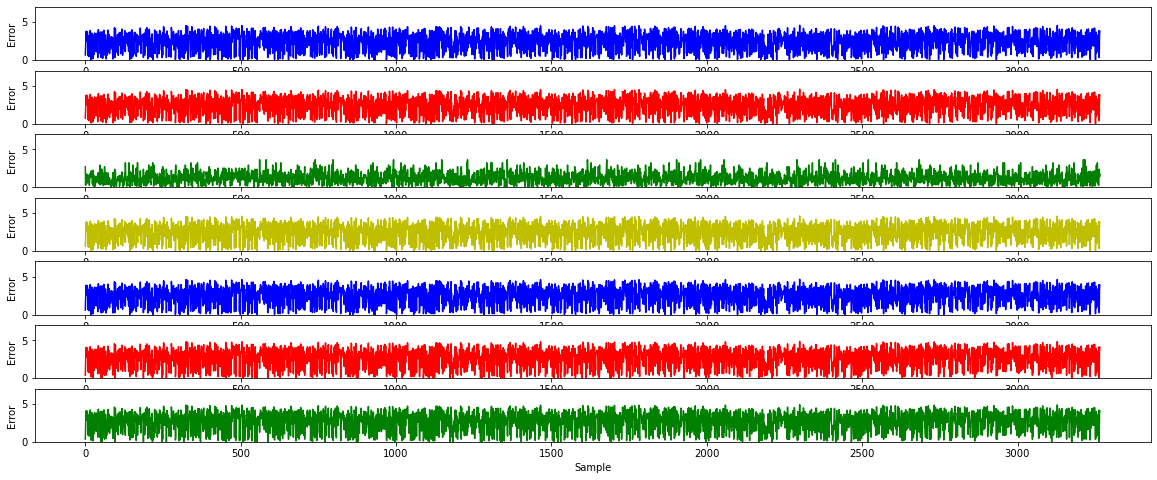

In [484]:

fig=plt.figure(figsize=(20,8))

fig.add_subplot(7,1,1)
plt.plot(np.sqrt(np.power(pred_data1[0]-y_test,2)),color='b')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])

fig.add_subplot(7,1,2)
plt.plot(np.sqrt(np.power(pred_data2[0]-y_test,2)),color='r')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])

fig.add_subplot(7,1,3)
plt.plot(np.sqrt(np.power(pred_data3[0]-y_test,2)),color='g')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])

fig.add_subplot(7,1,4)
plt.plot(np.sqrt(np.power(pred_data4[0]-y_test,2)),color='y')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])

fig.add_subplot(7,1,5)
plt.plot(np.sqrt(np.power(pred_data5[0]-y_test,2)),color='b')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])

fig.add_subplot(7,1,6)
plt.plot(np.sqrt(np.power(pred_data6[0]-y_test,2)),color='r')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])

fig.add_subplot(7,1,7)
plt.plot(np.sqrt(np.power(pred_data7[0]-y_test,2)),color='g')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,7])


plt.show()

In [485]:
from sklearn.model_selection import GridSearchCV 

param_grid={
    "max_depth":[1,0,-1],
    "learning-rate":[0.1,0.01,1,100,10,0.001],
    "n_estimators":[237,240,243]
} 

gcv=GridSearchCV(reg7,param_grid,scoring='neg_mean_squared_error',verbose=2)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=240; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ...learning-rate=0.1, max_depth=1, n_estimators=240; total time= 

[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=237; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=237; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimators=240; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ..learning-rate=0.01, max_depth=0, n_estimator

[CV] END ....learning-rate=1, max_depth=-1, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimators=237; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=1, max_depth=-1, n_estimator

[CV] END ....learning-rate=10, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimators=237; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimators=240; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimators=240; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimators=240; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimators=240; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimators=240; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END ....learning-rate=10, max_depth=1, n_estimator

[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=240; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=243; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[CV] END .learning-rate=0.001, max_depth=0, n_estimators=243; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: learning-rate
[

GridSearchCV(estimator=LGBMRegressor(n_estimators=1000),
             param_grid={'learning-rate': [0.1, 0.01, 1, 100, 10, 0.001],
                         'max_depth': [1, 0, -1],
                         'n_estimators': [237, 240, 243]},
             scoring='neg_mean_squared_error', verbose=2)

In [486]:
print(gcv.best_estimator_)

LGBMRegressor(learning-rate=0.1, max_depth=0, n_estimators=243)


In [487]:
print(gcv.best_params_)

{'learning-rate': 0.1, 'max_depth': 0, 'n_estimators': 243}


In [488]:
final_model=gcv.best_estimator_
result_final=final_model.predict(X_test)

In [489]:
print('Best LightGBM')
print(mean_squared_error(y_test,result_final))

Best LightGBM
0.10648616505712573


# 10. 모델 선택

In [490]:
final_model.fit(df_X,df_Y)
pred = final_model.predict(test)

pred_exp = np.expm1(pred)

[LightGBM] [Warning] Unknown parameter: learning-rate


In [491]:
submission = pd.read_csv("./sampleSubmission.csv")
submission

submission["count"] = pred_exp

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.808339
1,2011-01-20 01:00:00,4.573388
2,2011-01-20 02:00:00,3.235460
3,2011-01-20 03:00:00,2.912487
4,2011-01-20 04:00:00,1.347772


In [492]:
save_path = '.'

submission.to_csv( save_path+'/real_submission.csv', 
                  index=False)